<a href="https://colab.research.google.com/github/juanignaciogiacobbe/7506R-2C2023-GRUPO15/blob/main/7506R_TP1_GRUPO15_CHP3_ENTREGA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>Organizaci&oacute;n de Datos</center>
#### <center>C&aacute;tedra Ing. Rodriguez, Juan Manuel </center>

## <center>Trabajo Práctico 1: Reservas de Hotel</center>
### <center> Grupo número 15</center>
### <center> Giacobbe, Juan Ignacio; Olaran, Sebastian; Ayala, Tomás</center>

#Checkpoint 3: Ensambles

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importamos las librerías que vamos a utilizar

In [5]:
#Para análisis de los datos
import pandas as pd
import numpy as np

#Para visualizaciones
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('always')

#Para crear nuestros modelos predictivos
import sklearn as sk
from sklearn.model_selection import StratifiedKFold, KFold,RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer, f1_score
from sklearn.metrics import DistanceMetric
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_recall_curve, roc_curve, recall_score, accuracy_score,f1_score

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


Cargamos los archivos csv de datos en dos DataFrames de Pandas(importamos para el dataset de train el dataset que nos quedó como resultado en el checkpoint 2)

In [6]:
ds_hoteles_test = pd.read_csv('./ds_hoteles_test_checkpoint_3.csv')
ds_hoteles_train = pd.read_csv('./ds_hoteles_train_checkpoint_3.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


##Breve resumen del dataset
Comenzamos haciendo un breve repaso de las características del dataset a analizar

In [7]:
ds_hoteles_train.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


(60897, 47)

Tenemos un dataset con 60897 registros de reservas de hotel, con 32 columnas correspondientes a variables que describen las reservas(por ejemplo, tenemos una variable que indica la cantidad de adultos que tenemos por reserva).


Veamos los primeros dos registros del dataset

In [ ]:
ds_hoteles_train.head(2)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreCl

,Unnamed: 0.1,Unnamed: 0,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,market_segment_Undefined,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,deposit_type_Non Refund,deposit_type_Refundable
0,0,0,49,2016,0,37,5,1,2,1,...,0,0,0,1,0,0,1,0,0,0
1,1,1,4,2015,1,44,31,0,1,2,...,0,1,0,0,0,0,1,0,0,0


Veamos las variables que hay en el dataset

In [ ]:
ds_hoteles_train.columns.tolist()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


['Unnamed: 0.1',
 'Unnamed: 0',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'country',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'agent',
 'company',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'is_canceled',
 'hotel_Resort Hotel',
 'meal_FB',
 'meal_HB',
 'meal_SC',
 'meal_Undefined',
 'market_segment_Complementary',
 'market_segment_Corporate',
 'market_segment_Direct',
 'market_segment_Groups',
 'market_segment_Offline TA/TO',
 'market_segment_Online TA',
 'market_segment_Undefined',
 'distribution_channel_Direct',
 'distribution_channel_GDS',
 'distribution_channel_TA/TO',
 'distribution_channel_Undefined',
 'customer_type_Group',
 'customer_type_Transient',
 'cus

**Descripción de cada campo**



*   hotel(categórica): indica el tipo de hotel en el que se realizó la reserva.
*   lead_time(cualitativa): indica el tiempo desde que se reservó hasta que la persona llegó al hotel.
*   arrival_date_year/month/week_number/day_of_month: indican la fecha de llegada.
*   stays_in_weekend/week_nights: indican las noches que están reservadas.
*   adults, children, babies: indican la cantidad de adultos, niños y bebés respectivamente.
*   meal: indica el tipo de comida que incluye la reserva.
*   country: el país destino de la reserva.
*   market_segment: Segmento del mercado al cual está destinada la reserva.
*   distribution_chanel: Canal de distribución de reservas
*   is_repeated_guest: Indica si el cliente ya ha tenido experiencia reservando.
*   previous_cancellations/ previous_bookings_not_canceled: Indican la cantidad de reservas canceladas y no canceladas de un cliente.
*   reserved_room_type/ assigned_room_type: Tipo de habitación reservada y asignada respectivamente.
*   booking_changes: Cambios que hubieron en el booking.
*   deposit_type: Tipo de depósito que tuvo la reserva.
*   agent: Agente de viajes al que está asignada la reserva.
*   company: Empresa a cargo del booking de la reserva.
*   days_in_waiting_list: Días en que la reserva estuvo en lista de espera.
*   customer_type: Tipo de cliente que tuvo la reserva.
*   adr: Precio promedio de alquiler por día.
*   required_car_parking_spaces: Cantidad de espacios de estacionamiento requeridos.
*   total_of_special_requests: Cantidad de invitados.



---

##Construcción de ensambles

Enumeramos los features que utilizaremos para nuestros modelos predictivos

In [8]:
features = ['hotel_Resort Hotel', 'meal_FB', 'meal_HB', 'meal_SC', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights',
 'adults', 'children', 'babies', 'country', 'meal_Undefined', 'market_segment_Complementary', 'market_segment_Corporate', 'market_segment_Direct', 'market_segment_Groups', 'market_segment_Offline TA/TO',
'market_segment_Online TA', 'market_segment_Undefined',
 'customer_type_Group', 'customer_type_Transient', 'customer_type_Transient-Party', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled',
  'booking_changes', 'deposit_type_Non Refund', 'deposit_type_Refundable', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
 'total_of_special_requests']

target = 'is_canceled'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


Separamos en conjuntos de train y test

In [ ]:
#Separo un set de Evaluacion
from sklearn.model_selection import train_test_split

#Creo un dataset con los features que voy a usar para clasificar
ds_trabajo_x=ds_hoteles_train.drop([target], axis='columns', inplace=False)

ds_trabajo_x = ds_trabajo_x.dropna()

#Creo un dataset con la variable target
ds_trabajo_y = ds_hoteles_train[target].copy()
ds_trabajo_y = ds_trabajo_y.dropna()

x_train, x_test, y_train, y_test = train_test_split(ds_hoteles_train[features].values,
                                                    ds_hoteles_train[target].values,
                                                    test_size=0.2,    #20% al conjunto de test
                                                    random_state=13,  #para poder reproducir el experimento
                                                    stratify=ds_hoteles_train[target].values) #estratificado para mantener proporcion

#Verifico Cantidad de Datos en cada set
print('# Datos Entrenamiento: {}'.format(len(x_train)))
print('# Datos Prueba: {}'.format(len(x_test)))

#Verifico como quedaron balanceados
for split_name, split in zip(['% Positivos Entrenamiento','% Positivos Prueba'],[y_train,y_test]):
  print('{}: {:.3f}'.format(split_name,pd.Series(split).value_counts(normalize=True)[1]*100))

# Datos Entrenamiento: 48717
# Datos Prueba: 12180
% Positivos Entrenamiento: 50.459
% Positivos Prueba: 50.460


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


###Clasificador KNN

Lo que haremos será optimizar sus hiperparámetros mediante k-fold Cross Validation

In [ ]:
#Grilla de Parámetros
params_grid={ 'n_neighbors':range(1,100),
              'weights':['distance','uniform'],
              'algorithm':['ball_tree', 'kd_tree', 'brute'],
              'metric':['euclidean','manhattan','chebyshev']
             }

#Clasificador KNN
knn=KNeighborsClassifier()

#Random Search con 10 Folds y 10 iteraciones
rand = RandomizedSearchCV(knn, params_grid, cv=10, scoring='f1', n_iter=10, random_state=5)

rand.fit(x_train, y_train)
rand.cv_results_['mean_test_score']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


array([0.73040244, 0.777184  , 0.6690257 , 0.74757978, 0.74740869,
       0.78669156, 0.69491765, 0.7477069 , 0.75756273, 0.66309074])

In [ ]:
#Mejores hiperparametros
print(rand.best_params_)
#Mejor métrica
print(rand.best_score_)

{'weights': 'distance', 'n_neighbors': 20, 'metric': 'manhattan', 'algorithm': 'brute'}
0.7866915589604487


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [ ]:
#Mejor estimador
knn_classifier_1 = KNeighborsClassifier(n_neighbors= 20, weights= 'distance', metric='manhattan', algorithm='brute')
#Predicción con mejor estimador
knn_classifier_1.fit(x_train, y_train)
y_pred=knn_classifier_1.predict(x_test)

#Accuracy test
f1_score(y_test,y_pred)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


0.7887975744035745

prediccion sobre el test

In [ ]:
ds_test_prediccion = ds_hoteles_test.copy()

ds_test_prediccion['market_segment_Undefined'] = 0
ds_test_prediccion['distribution_channel_Undefined'] = 0
ds_test_prediccion['agent'] = ds_test_prediccion['agent'].fillna('-1')
ds_test_prediccion['company'] = ds_test_prediccion['company'].fillna('-1')

ds_test_prediccion.drop('id', inplace=True, axis=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [ ]:
predict = knn_classifier_1.predict(ds_test_prediccion[features])

ds_resultados=pd.DataFrame(zip(ds_hoteles_test['id'], predict),columns=['id','is_canceled'])

ds_resultados['is_canceled'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names


1    14467
0    12068
Name: is_canceled, dtype: int64

In [ ]:
ds_resultados_copy_csv = ds_resultados.copy()
ds_resultados_copy_csv.set_index("id", inplace = True)
ds_resultados_copy_csv

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


,is_canceled
id,
e6d0d58a-ab96-44d3-b28f-85df1cc15f1e,1
aba9aac2-4495-4645-a60e-90328713c999,1
b345b5dc-c804-4d77-a39f-1f4e65d1f1ad,0
ce1b400e-afa1-4946-bdff-004b859eb61c,1
c4fbec0d-8e2e-4db2-9d4f-a6ccb9f51214,1
...,...
636ccded-66ad-4538-8006-c0b9f84c6256,0
11e19741-bd28-4459-8ea3-184f1664000f,0
36a4c7b0-d6b1-4528-93db-311be96ec1c6,1


In [ ]:
ds_resultados.to_csv("predicciones_knn2.csv", index = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


segundo KNN

In [ ]:
#Grilla de Parámetros
params_grid={ 'n_neighbors':range(1,100),
              'weights':['distance','uniform'],
              'algorithm':['ball_tree', 'kd_tree', 'brute'],
              'metric':['euclidean','manhattan','chebyshev']
             }

#Clasificador KNN
knn=KNeighborsClassifier()

#Random Search con 10 Folds y 10 iteraciones
rand = RandomizedSearchCV(knn, params_grid, cv=5, scoring='f1', n_iter=100, random_state=5)

rand.fit(x_train, y_train)
rand.cv_results_['mean_test_score']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


array([0.75513352, 0.78218996, 0.75578016, 0.75366916, 0.77471387,
       0.78147878, 0.6915248 , 0.72446397, 0.67569398, 0.78281773,
       0.72957172, 0.72546457, 0.78167783, 0.66200455, 0.78157629,
       0.78259708, 0.73426803, 0.78167545, 0.7550493 , 0.68754312,
       0.72942662, 0.70815344, 0.74404232, 0.78243582, 0.78284003,
       0.74454328, 0.69243886, 0.74410287, 0.7561692 , 0.68164568,
       0.75361071, 0.71023167, 0.68163018, 0.7028966 , 0.78197546,
       0.75502898, 0.75455055, 0.75558678, 0.78262822, 0.6693847 ,
       0.72366561, 0.66667955, 0.77564232, 0.73200863, 0.74537959,
       0.73258472, 0.78159836, 0.73376703, 0.68439881, 0.68716464,
       0.72432215, 0.77756122, 0.74454049, 0.66231638, 0.67191828,
       0.67259269, 0.68529939, 0.6802104 , 0.70269402, 0.721965  ,
       0.7462963 , 0.75544465, 0.68026793, 0.72712729, 0.68823666,
       0.68636947, 0.75553196, 0.7426937 , 0.75463616, 0.74512977,
       0.77001289, 0.66641046, 0.68286608, 0.78249513, 0.78201

In [ ]:
#Mejores hiperparametros
print(rand.best_params_)
#Mejor métrica
print(rand.best_score_)

{'weights': 'distance', 'n_neighbors': 33, 'metric': 'manhattan', 'algorithm': 'kd_tree'}
0.78290768243381


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [ ]:
#Mejor estimador
best_knn=rand.best_estimator_

#Predicción con mejor estimador
y_pred=best_knn.predict(x_test)

#Accuracy test
f1_score(y_test,y_pred)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


0.7896161809205287

prediccion sobre el test

In [ ]:
ds_test_prediccion = ds_hoteles_test.copy()

ds_test_prediccion['market_segment_Undefined'] = 0
ds_test_prediccion['distribution_channel_Undefined'] = 0
ds_test_prediccion['agent'] = ds_test_prediccion['agent'].fillna('-1')
ds_test_prediccion['company'] = ds_test_prediccion['company'].fillna('-1')

ds_test_prediccion.drop('id', inplace=True, axis=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [ ]:
predict = best_knn.predict(ds_test_prediccion[features])

ds_resultados=pd.DataFrame(zip(ds_hoteles_test['id'], predict),columns=['id','is_canceled'])

ds_resultados['is_canceled'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names


1    14569
0    11966
Name: is_canceled, dtype: int64

In [ ]:
ds_resultados_copy_csv = ds_resultados.copy()
ds_resultados_copy_csv.set_index("id", inplace = True)
ds_resultados_copy_csv

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


,is_canceled
id,
e6d0d58a-ab96-44d3-b28f-85df1cc15f1e,1
aba9aac2-4495-4645-a60e-90328713c999,1
b345b5dc-c804-4d77-a39f-1f4e65d1f1ad,0
ce1b400e-afa1-4946-bdff-004b859eb61c,1
c4fbec0d-8e2e-4db2-9d4f-a6ccb9f51214,1
...,...
636ccded-66ad-4538-8006-c0b9f84c6256,0
11e19741-bd28-4459-8ea3-184f1664000f,0
36a4c7b0-d6b1-4528-93db-311be96ec1c6,1


In [ ]:
ds_resultados.to_csv("predicciones_knn1.csv", index = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


###Otro KNN

In [ ]:
params_grid={ 'n_neighbors':range(15,50),
              'weights':['distance','uniform'],
              'algorithm':['ball_tree', 'kd_tree', 'brute'],
              'metric':['euclidean','manhattan','chebyshev']
             }

#Clasificador KNN
knn=KNeighborsClassifier()

#Random Search con 10 Folds y 10 iteraciones
rand = RandomizedSearchCV(knn, params_grid, cv=7, scoring='f1', n_iter=100, random_state=5)

rand.fit(x_train, y_train)
rand.cv_results_['mean_test_score']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


array([0.69516792, 0.7464123 , 0.69691047, 0.67319062, 0.78543622,
       0.75613101, 0.72879026, 0.67767827, 0.75683337, 0.75758122,
       0.68402578, 0.75723149, 0.690383  , 0.73127564, 0.74521428,
       0.78483483, 0.78577138, 0.78475729, 0.74515502, 0.78525146,
       0.7291836 , 0.73732573, 0.67247593, 0.78602403, 0.74671215,
       0.78520079, 0.7848768 , 0.74470593, 0.78479525, 0.68679738,
       0.73492858, 0.68641643, 0.75670337, 0.75632021, 0.70183424,
       0.7462998 , 0.78635967, 0.72780184, 0.74766229, 0.69402026,
       0.75605543, 0.67327722, 0.72818229, 0.73477367, 0.73128335,
       0.7329642 , 0.78527457, 0.74596662, 0.74526672, 0.72894965,
       0.67028471, 0.78555787, 0.68357609, 0.72745522, 0.74416801,
       0.6801247 , 0.78481615, 0.75711451, 0.78576789, 0.7851366 ,
       0.68166224, 0.75764135, 0.75652775, 0.74679216, 0.78478211,
       0.74688164, 0.7859032 , 0.74585519, 0.73250751, 0.75681203,
       0.68005356, 0.74618225, 0.68001013, 0.78512188, 0.73156

In [ ]:
#Mejores hiperparametros
print(rand.best_params_)
#Mejor métrica
print(rand.best_score_)

{'weights': 'distance', 'n_neighbors': 40, 'metric': 'manhattan', 'algorithm': 'ball_tree'}
0.7867817463091813


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [ ]:
#Mejor estimador
best_knn=rand.best_estimator_

#Predicción con mejor estimador
y_pred=best_knn.predict(x_test)

#Accuracy test
f1_score(y_test,y_pred)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


0.789830238303977

prediccion sobre el test

In [ ]:
ds_test_prediccion = ds_hoteles_test.copy()

ds_test_prediccion['market_segment_Undefined'] = 0
ds_test_prediccion['distribution_channel_Undefined'] = 0
ds_test_prediccion['agent'] = ds_test_prediccion['agent'].fillna('-1')
ds_test_prediccion['company'] = ds_test_prediccion['company'].fillna('-1')

ds_test_prediccion.drop('id', inplace=True, axis=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [ ]:
predict = best_knn.predict(ds_test_prediccion[features])

ds_resultados=pd.DataFrame(zip(ds_hoteles_test['id'], predict),columns=['id','is_canceled'])

ds_resultados['is_canceled'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names


1    14630
0    11905
Name: is_canceled, dtype: int64

In [ ]:
ds_resultados_copy_csv = ds_resultados.copy()
ds_resultados_copy_csv.set_index("id", inplace = True)
ds_resultados_copy_csv

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreCl

,is_canceled
id,
e6d0d58a-ab96-44d3-b28f-85df1cc15f1e,1
aba9aac2-4495-4645-a60e-90328713c999,1
b345b5dc-c804-4d77-a39f-1f4e65d1f1ad,0
ce1b400e-afa1-4946-bdff-004b859eb61c,1
c4fbec0d-8e2e-4db2-9d4f-a6ccb9f51214,1
...,...
636ccded-66ad-4538-8006-c0b9f84c6256,0
11e19741-bd28-4459-8ea3-184f1664000f,0
36a4c7b0-d6b1-4528-93db-311be96ec1c6,1


In [ ]:
ds_resultados.to_csv("predicciones_knn3.csv", index = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


###Clasificador SVM

####Normalización de datos

Habiendo investigado sobre el funcionamiento de los Support Vector Machines de la librería scikit learn, hemos encontrado que, para obtener una mejor performance en este tipo de estimadores necesitamos tener conjuntos de datos con desviación estándar unitaria para cada característica. Esto significa en que debemos normalizar los datos que vamos a utilizar para crear el modelo.

Para los SVM, utilizaremos Standard Scaler, y MinMax Scaler, e iremos viendo cómo varían las performances de los modelos.

In [9]:
#Separo un set de Evaluacion
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

#Creo un dataset con los features que voy a usar para clasificar
ds_trabajo_x=ds_hoteles_train.drop([target], axis='columns', inplace=False)

ds_trabajo_x = ds_trabajo_x.dropna()

#Creo un dataset con la variable target
ds_trabajo_y = ds_hoteles_train[target].copy()
ds_trabajo_y = ds_trabajo_y.dropna()

x_train, x_test, y_train, y_test = train_test_split(ds_hoteles_train[features].values,
                                                    ds_hoteles_train[target].values,
                                                    test_size=0.2,    #20% al conjunto de test
                                                    random_state=13,  #para poder reproducir el experimento
                                                    stratify=ds_hoteles_train[target].values) #estratificado para mantener proporcion

#Armo una version escalada con minmax (media=0 , var=1  )
min_max_scaler = preprocessing.MinMaxScaler()
x_train_minmax = min_max_scaler.fit_transform(x_train)
x_test_minmax  = min_max_scaler.transform(x_test)

#Armo una version estandarizada
stand_scaler = preprocessing.StandardScaler()
x_train_norm = stand_scaler.fit_transform(x_train)
x_test_norm=stand_scaler.transform(x_test)

#Verifico Cantidad de Datos en cada set
print('# Datos Entrenamiento: {}'.format(len(x_train)))
print('# Datos Prueba: {}'.format(len(x_test)))

#Verifico como quedaron balanceados
for split_name, split in zip(['% Positivos Entrenamiento','% Positivos Prueba'],[y_train,y_test]):
  print('{}: {:.3f}'.format(split_name,pd.Series(split).value_counts(normalize=True)[1]*100))

# Datos Entrenamiento: 48717
# Datos Prueba: 12180
% Positivos Entrenamiento: 50.459
% Positivos Prueba: 50.460


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


Conseguimos de esta forma una normalización de datos para crear nuestros modelos. Ahora, optimicemos los hiperparámetros de los SVM para buscar obtener la mejor performance.

####Optimización de hiperparámetros

#####SVM con kernel del tipo Lineal

In [11]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

#Conjunto de parámetros que quiero usar
params_grid = {'C': [0, 1, 10, 100, 1000], 'kernel': ['linear']}

#Clasificador
base_svm = SVC()

#Metrica que quiero optimizar F1 Score
scorer_fn = make_scorer(f1_score)

#GridSearch CV
gridcv = GridSearchCV(estimator=base_svm ,param_grid=params_grid,scoring=scorer_fn)

gridcv.fit(x_train_minmax,y_train)

gridcv.cv_results_['mean_test_score']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_

array([       nan, 0.75102215, 0.75609867, 0.75652421, 0.75673928])

In [12]:
#Mejores hiperparametros
print(gridcv.best_params_)
#Mejor métrica
print(gridcv.best_score_)

{'C': 1000, 'kernel': 'linear'}
0.7567392795961597


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [15]:
#Mejor estimador
best_svm=gridcv.best_estimator_

#Predicción con mejor estimador
y_pred=best_svm.predict(x_test_minmax)

#Accuracy test
f1_score(y_test,y_pred)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


0.7550442173950374

prediccion sobre el test

In [19]:
ds_test_prediccion = ds_hoteles_test.copy()

ds_test_prediccion['market_segment_Undefined'] = 0
ds_test_prediccion['distribution_channel_Undefined'] = 0
ds_test_prediccion['agent'] = ds_test_prediccion['agent'].fillna('-1')
ds_test_prediccion['company'] = ds_test_prediccion['company'].fillna('-1')

ds_test_prediccion.drop('id', inplace=True, axis=1)

x_dataset_test_minmax  = min_max_scaler.transform(ds_test_prediccion[features])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names


In [20]:
predict = best_svm.predict(x_dataset_test_minmax)

ds_resultados=pd.DataFrame(zip(ds_hoteles_test['id'], predict),columns=['id','is_canceled'])

ds_resultados['is_canceled'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


0    14562
1    11973
Name: is_canceled, dtype: int64

In [21]:
ds_resultados_copy_csv = ds_resultados.copy()
ds_resultados_copy_csv.set_index("id", inplace = True)
ds_resultados_copy_csv

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreCl

,is_canceled
id,
e6d0d58a-ab96-44d3-b28f-85df1cc15f1e,1
aba9aac2-4495-4645-a60e-90328713c999,0
b345b5dc-c804-4d77-a39f-1f4e65d1f1ad,0
ce1b400e-afa1-4946-bdff-004b859eb61c,1
c4fbec0d-8e2e-4db2-9d4f-a6ccb9f51214,1
...,...
636ccded-66ad-4538-8006-c0b9f84c6256,0
11e19741-bd28-4459-8ea3-184f1664000f,0
36a4c7b0-d6b1-4528-93db-311be96ec1c6,1


In [22]:
ds_resultados.to_csv("predicciones_svm1.csv", index = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


###Clasificador Random Forest(1)

Random Forest es un tipo de algoritmo de ensamble, lo que significa que combina múltiples modelos (en este caso, árboles de decisión) para mejorar el rendimiento general y reducir el sobreajuste. Esto se hace mediante el proceso de promedio o votación de los resultados de los árboles individuales.

Dado nuestros features,vamos a crear una instancia de random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier


#Creamos un clasificador con hiperparámetros arbitrarios
rfc = RandomForestClassifier(max_features='auto',
                             oob_score=True,
                             random_state=2,
                             n_jobs=-1,
                             criterion="entropy",
                             min_samples_leaf=12,
                             min_samples_split=13,
                             n_estimators= 100 )
#Entrenamos el modelo
model = rfc.fit(X = x_train, y = y_train)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec()

In [ ]:

#Predicción con mejor estimador
y_pred=model.predict(x_test)

#Accuracy test
f1_score(y_test,y_pred)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


0.8527501438789773

In [ ]:
#Probemos verlos juntos en un DataFrame
ds_resultados=pd.DataFrame(zip(y_test,y_pred),columns=['test','pred'])
ds_resultados.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


,test,pred
0,1,1
1,0,0
2,1,1
3,0,0
4,0,0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


Text(50.722222222222214, 0.5, 'True')

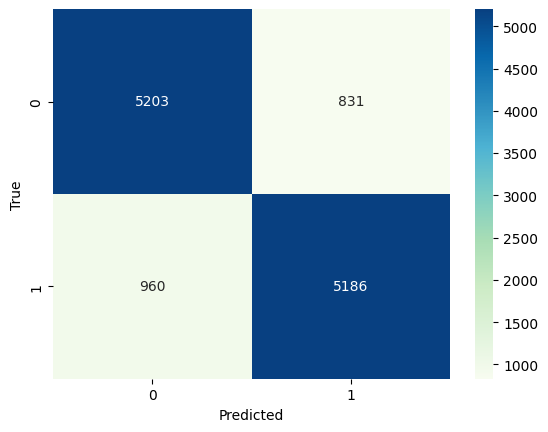

In [ ]:
#Creo la matriz de confusión
tabla=confusion_matrix(y_test, y_pred)

#Grafico la matriz de confusión
sns.heatmap(tabla,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [ ]:
ds_test_prediccion = ds_hoteles_test.copy()

ds_test_prediccion['market_segment_Undefined'] = 0
ds_test_prediccion['distribution_channel_Undefined'] = 0
ds_test_prediccion['agent'] = ds_test_prediccion['agent'].fillna('-1')
ds_test_prediccion['company'] = ds_test_prediccion['company'].fillna('-1')

ds_test_prediccion.drop('id', inplace=True, axis=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [ ]:
predict = model.predict(ds_test_prediccion[features])

ds_resultados=pd.DataFrame(zip(ds_hoteles_test['id'], predict),columns=['id','is_canceled'])

ds_resultados['is_canceled'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names


0    13593
1    12942
Name: is_canceled, dtype: int64

In [ ]:
ds_resultados_copy_csv = ds_resultados.copy()
ds_resultados_copy_csv.set_index("id", inplace = True)
ds_resultados_copy_csv

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


,is_canceled
id,
e6d0d58a-ab96-44d3-b28f-85df1cc15f1e,1
aba9aac2-4495-4645-a60e-90328713c999,1
b345b5dc-c804-4d77-a39f-1f4e65d1f1ad,0
ce1b400e-afa1-4946-bdff-004b859eb61c,1
c4fbec0d-8e2e-4db2-9d4f-a6ccb9f51214,1
...,...
636ccded-66ad-4538-8006-c0b9f84c6256,0
11e19741-bd28-4459-8ea3-184f1664000f,0
36a4c7b0-d6b1-4528-93db-311be96ec1c6,1


In [ ]:
ds_resultados.to_csv("predicciones_rf1.csv", index = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


###Clasificador Random Forest(2)

Random Forest es un tipo de algoritmo de ensamble, lo que significa que combina múltiples modelos (en este caso, árboles de decisión) para mejorar el rendimiento general y reducir el sobreajuste. Esto se hace mediante el proceso de promedio o votación de los resultados de los árboles individuales.

Dado nuestros features,vamos a crear una instancia de random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier


#Creamos un clasificador con hiperparámetros arbitrarios
rfc = RandomForestClassifier(max_features='auto',
                             oob_score=True,
                             random_state=2,
                             n_jobs=-1,
                             criterion="entropy",
                             min_samples_leaf=10,
                             min_samples_split=15,
                             n_estimators= 1000 )
#Entrenamos el modelo
model = rfc.fit(X = x_train, y = y_train)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.


In [ ]:

#Predicción con mejor estimador
y_pred=model.predict(x_test)

#Accuracy test
f1_score(y_test,y_pred)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


0.8561103810775295

In [ ]:
#Probemos verlos juntos en un DataFrame
ds_resultados=pd.DataFrame(zip(y_test,y_pred),columns=['test','pred'])
ds_resultados.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


,test,pred
0,1,1
1,0,0
2,1,1
3,0,0
4,0,0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


Text(50.722222222222214, 0.5, 'True')

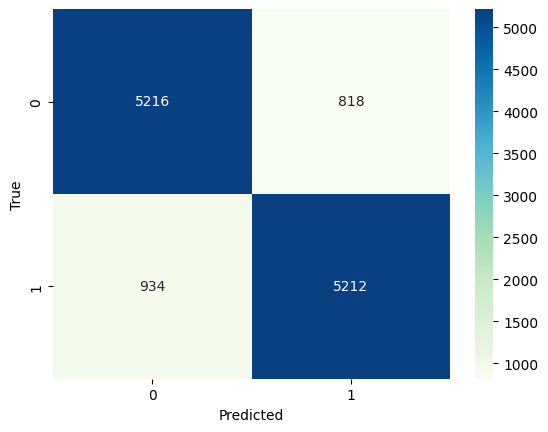

In [ ]:
#Creo la matriz de confusión
tabla=confusion_matrix(y_test, y_pred)

#Grafico la matriz de confusión
sns.heatmap(tabla,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [ ]:
ds_test_prediccion = ds_hoteles_test.copy()

ds_test_prediccion['market_segment_Undefined'] = 0
ds_test_prediccion['distribution_channel_Undefined'] = 0
ds_test_prediccion['agent'] = ds_test_prediccion['agent'].fillna('-1')
ds_test_prediccion['company'] = ds_test_prediccion['company'].fillna('-1')

ds_test_prediccion.drop('id', inplace=True, axis=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [ ]:
predict = model.predict(ds_test_prediccion[features])

ds_resultados=pd.DataFrame(zip(ds_hoteles_test['id'], predict),columns=['id','is_canceled'])

ds_resultados['is_canceled'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names


0    13663
1    12872
Name: is_canceled, dtype: int64

In [ ]:
ds_resultados_copy_csv = ds_resultados.copy()
ds_resultados_copy_csv.set_index("id", inplace = True)
ds_resultados_copy_csv

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


,is_canceled
id,
e6d0d58a-ab96-44d3-b28f-85df1cc15f1e,1
aba9aac2-4495-4645-a60e-90328713c999,1
b345b5dc-c804-4d77-a39f-1f4e65d1f1ad,0
ce1b400e-afa1-4946-bdff-004b859eb61c,1
c4fbec0d-8e2e-4db2-9d4f-a6ccb9f51214,1
...,...
636ccded-66ad-4538-8006-c0b9f84c6256,0
11e19741-bd28-4459-8ea3-184f1664000f,0
36a4c7b0-d6b1-4528-93db-311be96ec1c6,1


In [ ]:
ds_resultados.to_csv("predicciones_rf2.csv", index = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


###Clasificador Random Forest(2)

Random Forest es un tipo de algoritmo de ensamble, lo que significa que combina múltiples modelos (en este caso, árboles de decisión) para mejorar el rendimiento general y reducir el sobreajuste. Esto se hace mediante el proceso de promedio o votación de los resultados de los árboles individuales.

Dado nuestros features,vamos a crear una instancia de random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier


#Creamos un clasificador con hiperparámetros arbitrarios
rfc = RandomForestClassifier(max_features='auto',
                             oob_score=True,
                             random_state=2,
                             n_jobs=-1,
                             criterion="entropy",
                             min_samples_leaf=10,
                             min_samples_split=18,
                             n_estimators= 3000 )
#Entrenamos el modelo
model = rfc.fit(X = x_train, y = y_train)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.


In [ ]:

#Predicción con mejor estimador
y_pred=model.predict(x_test)

#Accuracy test
f1_score(y_test,y_pred)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


0.8561328510358435

In [ ]:
#Probemos verlos juntos en un DataFrame
ds_resultados=pd.DataFrame(zip(y_test,y_pred),columns=['test','pred'])
ds_resultados.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


,test,pred
0,1,1
1,0,0
2,1,1
3,0,0
4,0,0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


Text(50.722222222222214, 0.5, 'True')

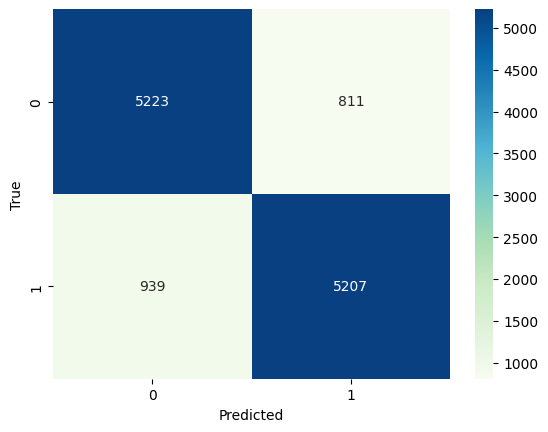

In [ ]:
#Creo la matriz de confusión
tabla=confusion_matrix(y_test, y_pred)

#Grafico la matriz de confusión
sns.heatmap(tabla,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [ ]:
ds_test_prediccion = ds_hoteles_test.copy()

ds_test_prediccion['market_segment_Undefined'] = 0
ds_test_prediccion['distribution_channel_Undefined'] = 0
ds_test_prediccion['agent'] = ds_test_prediccion['agent'].fillna('-1')
ds_test_prediccion['company'] = ds_test_prediccion['company'].fillna('-1')

ds_test_prediccion.drop('id', inplace=True, axis=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [ ]:
predict = model.predict(ds_test_prediccion[features])

ds_resultados=pd.DataFrame(zip(ds_hoteles_test['id'], predict),columns=['id','is_canceled'])

ds_resultados['is_canceled'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names


0    13680
1    12855
Name: is_canceled, dtype: int64

In [ ]:
ds_resultados_copy_csv = ds_resultados.copy()
ds_resultados_copy_csv.set_index("id", inplace = True)
ds_resultados_copy_csv

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


,is_canceled
id,
e6d0d58a-ab96-44d3-b28f-85df1cc15f1e,1
aba9aac2-4495-4645-a60e-90328713c999,1
b345b5dc-c804-4d77-a39f-1f4e65d1f1ad,0
ce1b400e-afa1-4946-bdff-004b859eb61c,1
c4fbec0d-8e2e-4db2-9d4f-a6ccb9f51214,1
...,...
636ccded-66ad-4538-8006-c0b9f84c6256,0
11e19741-bd28-4459-8ea3-184f1664000f,0
36a4c7b0-d6b1-4528-93db-311be96ec1c6,1


In [ ]:
ds_resultados.to_csv("predicciones_rf3.csv", index = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
